In [6]:
import pandas as pd
import numpy as np

epochs = list(range(1, 31)) #to maintain consistency

graphsage_train = [
    1.9384, 1.5581, 1.4222, 1.3404, 1.2772, 1.2317, 1.1915, 1.1542, 1.1213, 1.0770,
    1.0412, 1.0134, 0.9884, 0.9746, 0.9591, 0.9480, 0.9407, 0.9319, 0.9279, 0.9206,
    0.9173, 0.9118, 0.9123, 0.9061, 0.9046, 0.9073, 0.9034, 0.8999, 0.8939, 0.8926
]
graphsage_val = [
    1.6944, 1.7150, 1.6633, 1.7304, 1.6734, 1.6747, 1.7009, 1.6977, 1.6689, 1.6475,
    1.6503, 1.6688, 1.6651, 1.6446, 1.6625, 1.6814, 1.6704, 1.6677, 1.6458, 1.6680,
    1.6538, 1.6596, 1.6613, 1.6664, 1.6652, 1.6825, 1.6865, 1.6432, 1.6653, 1.7029
]

gin_train = [
    2.3380, 1.7823, 1.6425, 1.5402, 1.4625, 1.4024, 1.3565, 1.3184, 1.2808, 1.2506,
    1.2265, 1.2028, 1.1823, 1.1659, 1.1525, 1.1404, 1.1278, 1.1147, 1.1030, 1.0948,
    1.0804, 1.0701, 1.0606, 1.0489, 1.0385, 1.0288, 1.0200, 1.0113, 0.9988, 0.9891
]
gin_val = [
    1.8058, 1.6682, 1.7804, 1.7001, 1.7058, 1.7118, 1.6765, 1.7088, 1.6710, 1.6931,
    1.6732, 1.6915, 1.7050, 1.6616, 1.6727, 1.6702, 1.6816, 1.6828, 1.6709, 1.6568,
    1.6832, 1.6483, 1.6521, 1.6696, 1.6345, 1.6359, 1.6581, 1.6726, 1.6480, 1.6586
]

ggnn_train = [1.9305, 1.5987, 1.4937, 1.4183, 1.3465, 1.2773, 1.2122, 1.1471, 1.0848, 1.0419] + [np.nan] * 20
ggnn_val = [1.7693, 1.7467, 1.7052, 1.6845, 1.6641, 1.6708, 1.6557, 1.6401, 1.6237, 1.6182] + [np.nan] * 20

graphormer_train = [0.2059, 0.1591, 0.0916, 0.1104, 0.1137, 0.0822] + [np.nan] * 24
graphormer_val = [0.0888, 0.1343, 0.1010, 0.1205, 0.0923, 0.0934] + [np.nan] * 24

loss_data = {
    "Epoch": epochs,
    "GraphSAGE_Train": graphsage_train,
    "GraphSAGE_Val": graphsage_val,
    "GIN_Train": gin_train,
    "GIN_Val": gin_val,
    "GGNN_Train": ggnn_train,
    "GGNN_Val": ggnn_val,
    "Graphormer_Train": graphormer_train,
    "Graphormer_Val": graphormer_val
}

df = pd.DataFrame(loss_data)
print(df.head(15))

    Epoch  GraphSAGE_Train  GraphSAGE_Val  GIN_Train  GIN_Val  GGNN_Train  \
0       1           1.9384         1.6944     2.3380   1.8058      1.9305   
1       2           1.5581         1.7150     1.7823   1.6682      1.5987   
2       3           1.4222         1.6633     1.6425   1.7804      1.4937   
3       4           1.3404         1.7304     1.5402   1.7001      1.4183   
4       5           1.2772         1.6734     1.4625   1.7058      1.3465   
5       6           1.2317         1.6747     1.4024   1.7118      1.2773   
6       7           1.1915         1.7009     1.3565   1.6765      1.2122   
7       8           1.1542         1.6977     1.3184   1.7088      1.1471   
8       9           1.1213         1.6689     1.2808   1.6710      1.0848   
9      10           1.0770         1.6475     1.2506   1.6931      1.0419   
10     11           1.0412         1.6503     1.2265   1.6732         NaN   
11     12           1.0134         1.6688     1.2028   1.6915         NaN   

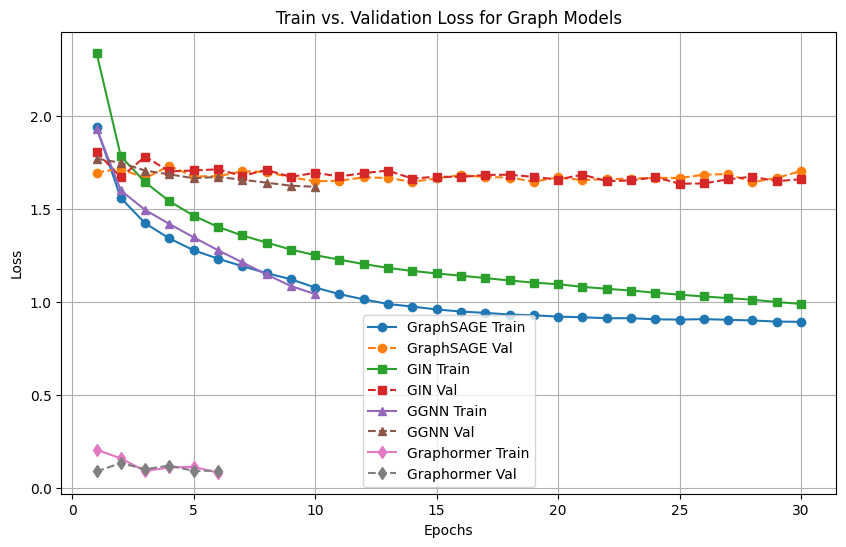

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df["Epoch"], df["GraphSAGE_Train"], label="GraphSAGE Train", linestyle="-", marker="o")
plt.plot(df["Epoch"], df["GraphSAGE_Val"], label="GraphSAGE Val", linestyle="--", marker="o")

plt.plot(df["Epoch"], df["GIN_Train"], label="GIN Train", linestyle="-", marker="s")
plt.plot(df["Epoch"], df["GIN_Val"], label="GIN Val", linestyle="--", marker="s")

plt.plot(df["Epoch"], df["GGNN_Train"], label="GGNN Train", linestyle="-", marker="^")
plt.plot(df["Epoch"], df["GGNN_Val"], label="GGNN Val", linestyle="--", marker="^")

plt.plot(df["Epoch"], df["Graphormer_Train"], label="Graphormer Train", linestyle="-", marker="d")
plt.plot(df["Epoch"], df["Graphormer_Val"], label="Graphormer Val", linestyle="--", marker="d")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs. Validation Loss for Graph Models")
plt.legend()
plt.grid(True)
plt.show()

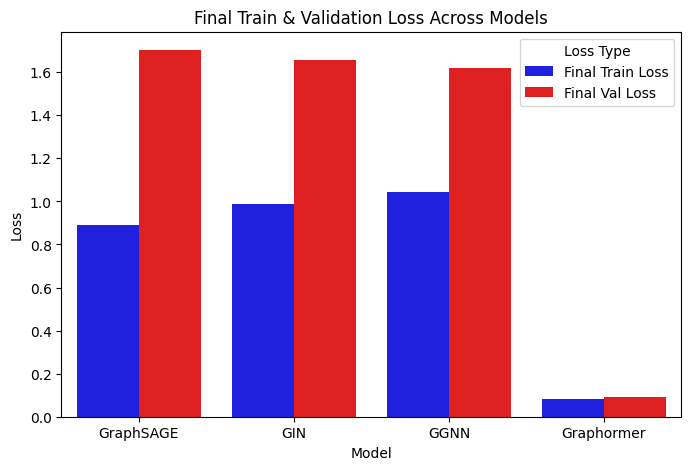

In [11]:
plt.figure(figsize=(8, 5))
final_losses_melted = final_losses.melt(id_vars="Model", var_name="Loss Type", value_name="Loss")
sns.barplot(x="Model", y="Loss", hue="Loss Type", data=final_losses_melted, palette={"Final Train Loss": "blue", "Final Val Loss": "red"})

plt.title("Final Train & Validation Loss Across Models")
plt.ylabel("Loss")
plt.xlabel("Model")
plt.legend(title="Loss Type")
plt.show()


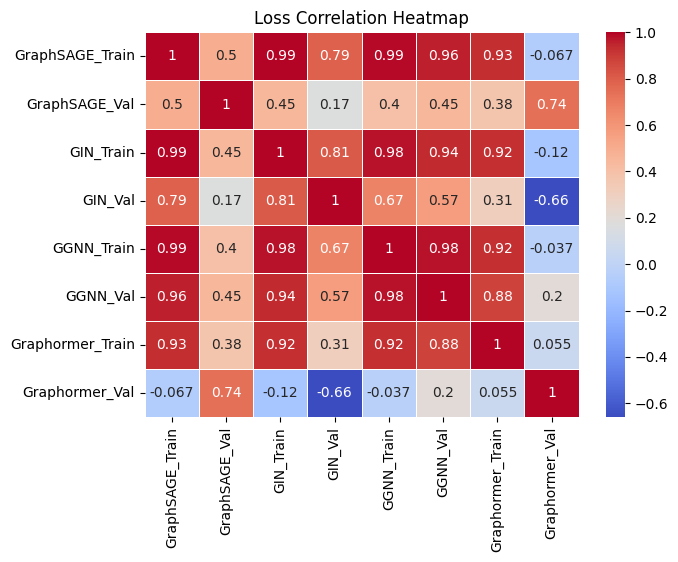

In [12]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.drop(columns=["Epoch"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Loss Correlation Heatmap")
plt.show()